In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Resources/CSV/General/cleaned_df.csv')

In [2]:
# handle school id and school name
school_map = dict(zip(df['School ID'], df['School Name']))

# Drop the 'School Name' column
df = df.drop(columns=['School Name', 'Student Enrollment All'])

In [3]:
state_to_conference = {
    'PAC-12': ['WA', 'OR', 'CA', 'AZ', 'UT', 'CO'],
    'SEC': ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'MO', 'SC', 'TN', 'TX'],
    'Big Ten': ['IL', 'IN', 'IA', 'MD', 'MI', 'MN', 'NE', 'NJ', 'OH', 'PA', 'WI'],
    'ACC': ['MA', 'NC', 'SC', 'VA', 'FL', 'GA', 'KY', 'NY'] + ['DE'],
    'Big 12': ['TX', 'OK', 'KS', 'WV', 'IA'],
    'AAC': ['TX', 'FL', 'TN', 'OH', 'LA'] + ['CT', 'MA', 'NH', 'VT', 'RI'] + ['ME'],
    'MWC': ['NV', 'CO', 'UT', 'NM', 'CA', 'HI', 'ID', 'WY'] + ['AK', 'MT', 'ND', 'SD', 'WY'],
    'MAC': ['IL', 'IN', 'MI', 'OH', 'PA', 'NY'],
    'Sun Belt': ['AL', 'AR', 'GA', 'LA', 'NC', 'SC', 'TX'],
    'Conference USA': ['AL', 'FL', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'TX', 'VA'] + ['DC', 'PR', 'VI', 'GU'],
    # Geographically reassigned "Independent" states
}

# Reverse mapping for states to conference
state_to_conference_flat = {}
for conference, states in state_to_conference.items():
    for state in states:
        state_to_conference_flat[state] = conference

df['College Conference'] = df['School State'].map(state_to_conference_flat)
df = df.drop(columns=['School State'])
# one hot encode college conferences and school ownership
df = pd.get_dummies(df, columns=['College Conference', 'School Ownership'])

# Impute EVERY NULL TO MEAN
df = df.fillna(df.mean())


In [4]:
X = df
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
# X_test_scaled = scaler.transform(X_test)        # Only transform the test data
X_scaled = scaler.fit_transform(X)

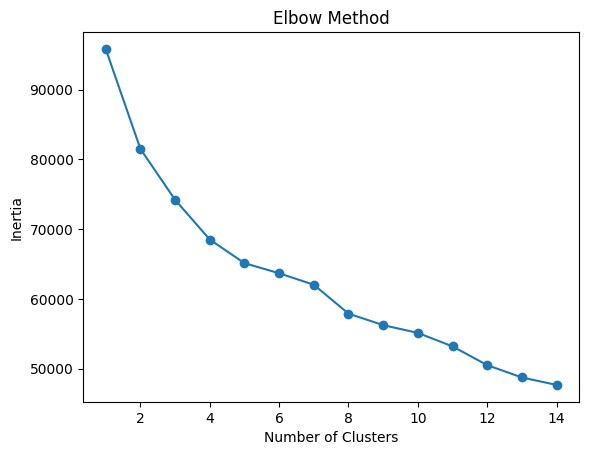

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# elbow method 
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

cluster the data with k-means

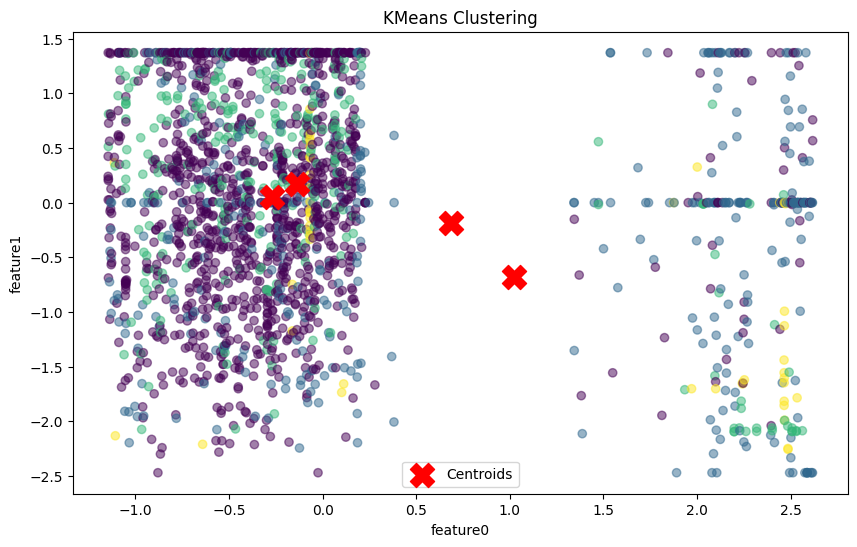

In [6]:


n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


# clusters = kmeans.fit_predict(scaled_data)
# df['Cluster'] = clusters


# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Cluster Plot')
# plt.legend()
# plt.show()


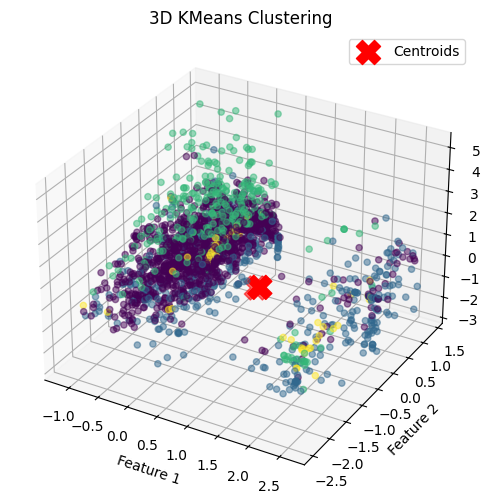

In [7]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', label='Centroids', marker='X')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D KMeans Clustering')
ax.legend()
plt.show()

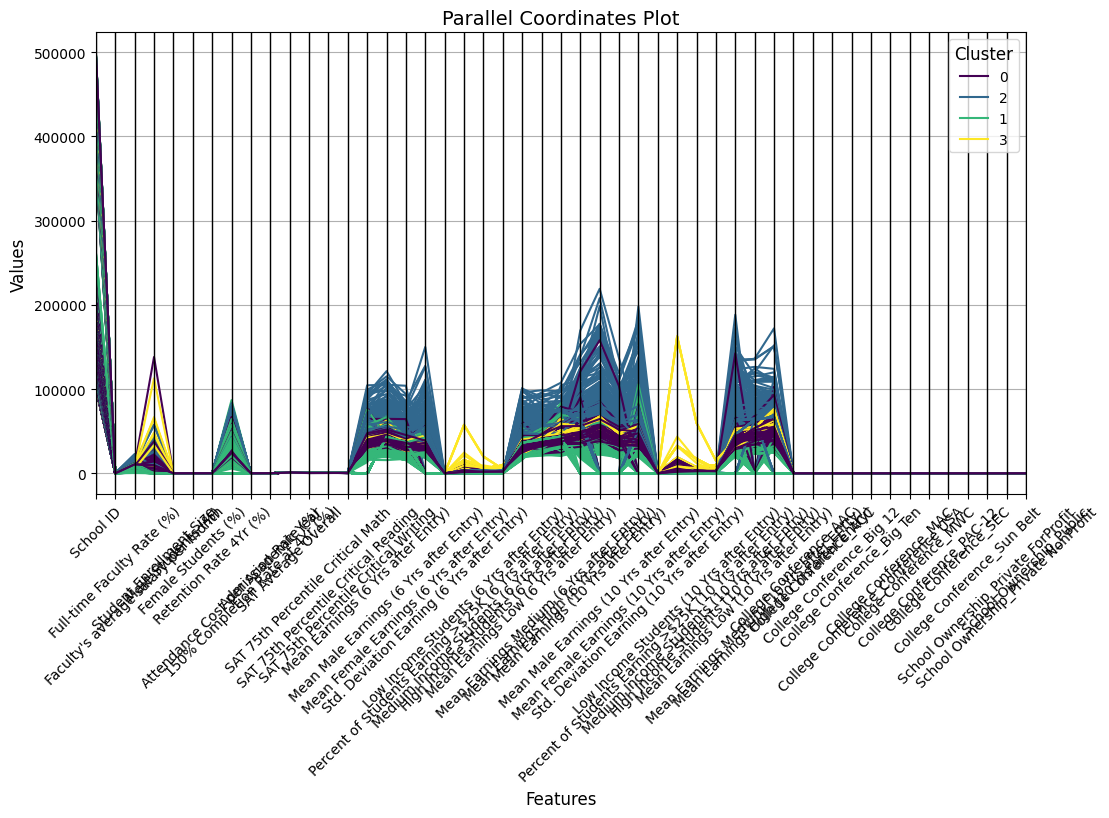

In [8]:
# parallel coordinates plot
from pandas.plotting import parallel_coordinates

df['Cluster'] = labels

plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.show()

evavluate and visualize clusters

In [9]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,School ID,Full-time Faculty Rate (%),Faculty's average salary per month,Student Enrollment Size,Male Students (%),Female Students (%),Retention Rate 4Yr (%),Attendance Cost per Academic Year,150% Completion Rate at 4Yr (%),Admission Rate (%),...,College Conference_Big Ten,College Conference_Conference USA,College Conference_MAC,College Conference_MWC,College Conference_PAC-12,College Conference_SEC,College Conference_Sun Belt,School Ownership_Private ForProfit,School Ownership_Private NonProfit,School Ownership_Public
Cluster,,,,,,,,,,,,,,,,,,,,,
0,192946.043178,65.757401,8028.318877,4379.841105,40.546813,59.366831,71.752277,36066.446459,53.269140,76.769401,...,0.104491,0.261658,0.269430,0.104491,0.031952,0.034542,0.049223,0.029361,0.583765,0.386874
1,294255.919643,59.492945,5852.471806,807.154018,53.218996,46.111384,71.139607,21470.205357,45.418645,72.473098,...,0.069196,0.357143,0.232143,0.180804,0.042411,0.020089,0.026786,0.133929,0.787946,0.078125
2,207327.504983,68.769435,12087.722477,8606.235880,43.166213,56.833787,86.592135,52970.322259,77.253330,53.615907,...,0.079734,0.196013,0.282392,0.162791,0.046512,0.019934,0.023256,0.073090,0.627907,0.299003
3,329703.591837,46.573308,8699.629855,11437.714286,48.443061,51.556939,63.929349,25670.489796,25.853673,75.217753,...,0.040816,0.163265,0.530612,0.122449,0.102041,0.000000,0.040816,0.448980,0.040816,0.510204


## interpret clusters and match colleges within the same cluster

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score

def print_cluster_summary(df):
    """Prints out the mean values per cluster."""
    cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
    print("Cluster Summary (Mean Values):")
    print(cluster_summary)
    return cluster_summary

def print_sample_schools(df, n=10):
    """Print sample schools for each cluster."""
    for c in df['Cluster'].unique():
        sample_schools = df[df['Cluster'] == c].index[:n]
        print(f"\nCluster {c}:")
        print(sample_schools.to_list())

def print_diff_from_global(df, cluster_summary):
    """Print the difference of cluster means from the global mean."""
    global_mean = df.mean(numeric_only=True)
    diff_from_global = cluster_summary - global_mean
    print("\nDifference from Global Mean by Cluster:")
    print(diff_from_global)
    return diff_from_global

def train_supervised_model(df, label, features_to_drop=None, test_size=0.2, random_state=42):
    """Train a supervised model to predict the given label and print the R^2 score."""
    if label not in df.columns:
        print(f"\n'{label}' column not found. Please specify a valid target variable.")
        return None

    if features_to_drop is None:
        features_to_drop = []
    # Ensure we drop the label column from the features
    features_to_drop = features_to_drop + [label]

    # Prepare feature set and target
    features = df.drop(columns=features_to_drop, errors='ignore')
    target = df[label]

    X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                        test_size=test_size, 
                                                        random_state=random_state)

    # Example model: Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"\nSupervised Model R^2 Score for predicting '{label}': {score:.3f}")
    return rf, score

In [11]:
# multi-output regression(one model for multiple labels)
from sklearn.multioutput import MultiOutputRegressor

def train_supervised_model_multiple_labels(df, labels, features_to_drop=None, test_size=0.2, random_state=42):
    """
    Train a single model to predict multiple labels simultaneously using a multi-output regressor.
    
    Parameters:
    - df (pd.DataFrame): Your main DataFrame.
    - labels (list of str): A list of column names to predict simultaneously.
    - features_to_drop (list of str): Columns to drop from features.
    - test_size (float): The test set ratio.
    - random_state (int): Random state for reproducibility.

    Returns:
    - multi_rf (MultiOutputRegressor): The trained multi-output model.
    - scores (dict): A dictionary of R^2 scores for each label.
    """
    if features_to_drop is None:
        features_to_drop = []
        
    # Check if all labels are in the DataFrame
    missing_labels = [lbl for lbl in labels if lbl not in df.columns]
    if missing_labels:
        print(f"Missing labels: {missing_labels}. Cannot proceed.")
        return None, None

    # Prepare features and target
    X = df.drop(columns=features_to_drop + labels, errors='ignore')
    Y = df[labels]  # This will be a DataFrame with multiple columns

    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)

    # For multiple outputs, wrap a regressor in a MultiOutputRegressor
    base_rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
    multi_rf = MultiOutputRegressor(base_rf)
    multi_rf.fit(X_train, y_train)

    y_pred = multi_rf.predict(X_test)

    # Evaluate R^2 for each label individually
    scores = {}
    for i, label in enumerate(labels):
        scores[label] = r2_score(y_test[label], y_pred[:, i])
        print(f"R^2 Score for predicting '{label}': {scores[label]:.3f}")

    return multi_rf, scores


In [12]:
df.columns

Index(['School ID', 'Full-time Faculty Rate (%)',
       'Faculty's average salary per month', 'Student Enrollment Size',
       'Male Students (%)', 'Female Students (%)', 'Retention Rate 4Yr (%)',
       'Attendance Cost per Academic Year', '150% Completion Rate at 4Yr (%)',
       'Admission Rate (%)', 'SAT Average Overall',
       'SAT 75th Percentile Critical Math',
       'SAT 75th Percentile Critical Reading',
       'SAT 75th Percentile Critical Writing',
       'Mean Earnings (6 Yrs after Entry)',
       'Mean Male Earnings (6 Yrs after Entry)',
       'Mean Female Earnings (6 Yrs after Entry)',
       'Std. Deviation Earning (6 Yrs after Entry)',
       'Percent of Students Earning >$25K (6 Yrs after Entry)',
       'Low Income Students (6 Yrs after Entry)',
       'Medium Income Students (6 Yrs after Entry)',
       'High Income Students (6 Yrs after Entry)',
       'Mean Earnings Low (6 Yrs after Entry)',
       'Mean Earnings Medium (6 Yrs after Entry)',
       'Mean Earni

In [13]:
# ======================
# Example Usage: One label
# ======================

# Assume df is already prepared and has 'Cluster', 'School ID', etc.
# Also assume `school_map` is defined.

# df['School Name'] = df['School ID'].map(school_map)
# df = df.set_index('School Name', drop=True)

# Print cluster summaries
cluster_summary = print_cluster_summary(df)

# Print sample schools
print_sample_schools(df)

# Print differences from global mean
diff_from_global = print_diff_from_global(df, cluster_summary)

# Train a supervised model with a user-specified label
user_chosen_label = 'Mean Earnings High (10 Yrs after Entry)'  # or any other column you want
model, score = train_supervised_model(
    df, 
    label=user_chosen_label, 
    features_to_drop=['School ID']  # drop ID and any other unnecessary columns
)

Cluster Summary (Mean Values):
             School ID  Full-time Faculty Rate (%)  \
Cluster                                              
0        192946.043178                   65.757401   
1        294255.919643                   59.492945   
2        207327.504983                   68.769435   
3        329703.591837                   46.573308   

         Faculty's average salary per month  Student Enrollment Size  \
Cluster                                                                
0                               8028.318877              4379.841105   
1                               5852.471806               807.154018   
2                              12087.722477              8606.235880   
3                               8699.629855             11437.714286   

         Male Students (%)  Female Students (%)  Retention Rate 4Yr (%)  \
Cluster                                                                   
0                40.546813            59.366831              

## A "good" R^2 score for a RandomForestRegressor generally falls in the range of 0.7 or higher
- and we got Supervised Model R^2 Score: 0.882!!
- Cluster 0: Medium-size enrollment, moderate cost, moderate faculty salaries.
- Cluster 1: Generally lower cost, smaller schools, possibly more private for-profit institutions.
- Cluster 2: More selective, higher cost, possibly more elite or private non-profit schools with high completion rates and better long-term earnings.
- Cluster 3: Large enrollment institutions, possibly more public with varied characteristics.
- Cluster 4: Higher cost, good retention, mix of private non-profit and public universities, with relatively high attendance cost and decent earnings outcomes.

In [14]:
# Example usage:# ======================
# Example Usage: multiple labels
# ======================
labels_to_predict = ['Mean Female Earnings (6 Yrs after Entry)', 'Student Enrollment Size']
multi_model, multi_scores = train_supervised_model_multiple_labels(df, labels=labels_to_predict, features_to_drop=['School ID'])

R^2 Score for predicting 'Mean Female Earnings (6 Yrs after Entry)': 0.954
R^2 Score for predicting 'Student Enrollment Size': 0.574


In [15]:
multi_scores

{'Mean Female Earnings (6 Yrs after Entry)': 0.9535679930480556,
 'Student Enrollment Size': 0.5743651141841153}

### EXAMPLE USAGE OF SUPERVISED

In [16]:
import pandas as pd
import numpy as np

# Columns from your training data
feature_columns = [
    'School ID', 'Full-time Faculty Rate (%)',
    "Faculty's average salary per month", 'Student Enrollment Size',
    'Male Students (%)', 'Female Students (%)', 'Retention Rate 4Yr (%)',
    'Attendance Cost per Academic Year', '150% Completion Rate at 4Yr (%)',
    'Admission Rate (%)', 'SAT Average Overall',
    'SAT 75th Percentile Critical Math',
    'SAT 75th Percentile Critical Reading',
    'SAT 75th Percentile Critical Writing',
    'Mean Earnings (6 Yrs after Entry)',
    'Mean Male Earnings (6 Yrs after Entry)',
    'Mean Female Earnings (6 Yrs after Entry)',
    'Std. Deviation Earning (6 Yrs after Entry)',
    'Percent of Students Earning >$25K (6 Yrs after Entry)',
    'Low Income Students (6 Yrs after Entry)',
    'Medium Income Students (6 Yrs after Entry)',
    'High Income Students (6 Yrs after Entry)',
    'Mean Earnings Low (6 Yrs after Entry)',
    'Mean Earnings Medium (6 Yrs after Entry)',
    'Mean Earnings High (6 Yrs after Entry)',
    'Mean Earnings (10 Yrs after Entry)',
    'Mean Male Earnings (10 Yrs after Entry)',
    'Mean Female Earnings (10 Yrs after Entry)',
    'Std. Deviation Earning (10 Yrs after Entry)',
    'Percent of Students Earning >$25K (10 Yrs after Entry)',
    'Low Income Students (10 Yrs after Entry)',
    'Medium Income Students (10 Yrs after Entry)',
    'High Income Students (10 Yrs after Entry)',
    'Mean Earnings Low (10 Yrs after Entry)',
    'Mean Earnings Medium (10 Yrs after Entry)',
    'Mean Earnings High (10 Yrs after Entry)',
    'College Conference_AAC',
    'College Conference_ACC',
    'College Conference_Big 12',
    'College Conference_Big Ten',
    'College Conference_Conference USA',
    'College Conference_MAC',
    'College Conference_MWC',
    'College Conference_PAC-12',
    'College Conference_SEC',
    'College Conference_Sun Belt',
    'School Ownership_Private ForProfit',
    'School Ownership_Private NonProfit',
    'School Ownership_Public',
    'Cluster', 'PCA1', 'PCA2'
]

# We'll make a single row of data
num_samples = 1

# Create a dictionary to hold random values
test_data = {}

# Some columns are clearly numeric, others are one-hot encoded (0/1)
# Let's assign random numeric values. 
# You might tailor ranges based on your domain knowledge.
for col in feature_columns:
    if 'College Conference_' in col or 'School Ownership_' in col or col == 'Cluster':
        # One-hot or cluster columns: choose 0 or 1 randomly, but ensure that for each 
        # set of mutually exclusive categories (like conferences), only one is 1.
        # For simplicity, we'll just randomly pick 0 or 1, but ideally you should pick 
        # the category that makes sense for your test scenario.
        test_data[col] = [np.random.choice([0, 1])]
    else:
        # Numeric columns: generate a random float or int
        # Adjust ranges as needed
        test_data[col] = [np.random.uniform(0, 10000)]

# Since "College Conference_" columns represent one-hot encoding of conference categories, 
# you might want to ensure that exactly one conference is set to 1 and the rest 0.
# Example: Set all conference columns to 0, then pick one at random:
conference_cols = [c for c in feature_columns if 'College Conference_' in c]
for c in conference_cols:
    test_data[c] = [0]
test_data[np.random.choice(conference_cols)] = [1]

# Similarly for ownership columns, ensure only one is set to 1:
ownership_cols = [c for c in feature_columns if 'School Ownership_' in c]
for c in ownership_cols:
    test_data[c] = [0]
test_data[np.random.choice(ownership_cols)] = [1]

# For 'Cluster', just pick 0, since cluster is assigned by the model, 
# but if you must provide a value:
test_data['Cluster'] = [np.random.randint(0,5)]

# Convert to DataFrame
new_data = pd.DataFrame(test_data, columns=feature_columns)

# oops
new_data = new_data.drop(columns=['PCA1', 'PCA2'], errors='ignore')

# Now new_data has one row of random values for all columns
print(new_data)

     School ID  Full-time Faculty Rate (%)  \
0  8228.214496                 8464.567878   

   Faculty's average salary per month  Student Enrollment Size  \
0                         4436.279606              2014.271199   

   Male Students (%)  Female Students (%)  Retention Rate 4Yr (%)  \
0        5644.307705          6420.333672             3744.916873   

   Attendance Cost per Academic Year  150% Completion Rate at 4Yr (%)  \
0                        3122.965172                      5949.880928   

   Admission Rate (%)  ...  College Conference_Conference USA  \
0         4581.700405  ...                                  0   

   College Conference_MAC  College Conference_MWC  College Conference_PAC-12  \
0                       0                       0                          0   

   College Conference_SEC  College Conference_Sun Belt  \
0                       0                            1   

   School Ownership_Private ForProfit  School Ownership_Private NonProfit  \
0 

In [17]:
new_data_scaled = scaler.transform(new_data)
predictions = multi_model.predict(new_data_scaled)

print("Predictions for the new input:")
print(predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cluster


- 17022.0: The first prediction for the first target variable. For example, if your first target was Mean Earnings (6 Years after Entry), this means the model predicts earnings of $17,022.0 for this input.
- 4913.35: The second prediction for the second target variable. For example, if your second target was Mean Earnings (10 Years after Entry), this means the model predicts earnings of $4,913.35 for the same input.